In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical


2025-08-18 22:32:05.695669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755556325.709436       8 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755556325.713706       8 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 22:32:05.731791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [3]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')


In [4]:
# check the class distribution for the author label in train_df?
train_df['author'].value_counts()


author
EAP    7090
MWS    5457
HPL    5074
Name: count, dtype: int64

In [5]:
# compute the character length for the rows and record these
train_df['text_length'] = train_df['text'].str.len()


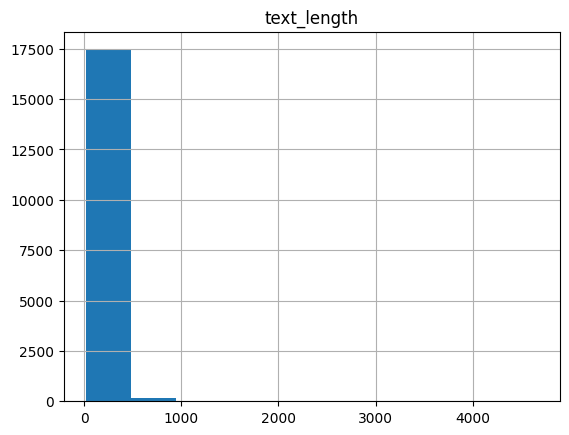

In [6]:
# look at the histogram plot for text length
train_df.hist()
plt.show()


In [7]:
# examine the text characters length in test_df and record these
test_df['text_length'] = test_df['text'].str.len()


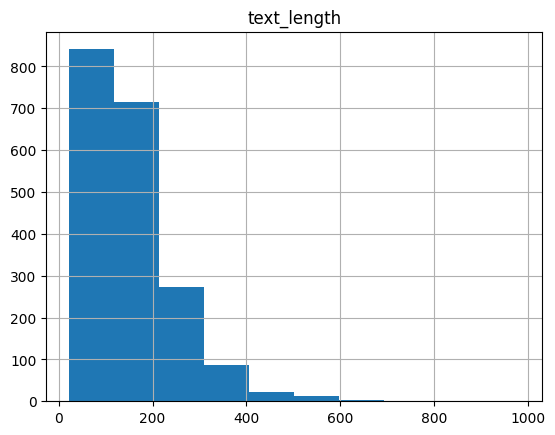

In [8]:
test_df.hist()
plt.show()


In [9]:
# convert author labels into numerical variables
train_df['author_num'] = train_df.author.map({'EAP':0, 'HPL':1, 'MWS':2})
# Check conversion for first 5 rows
train_df.head()


,id,text,author,text_length,author_num
0,id06121,So I did not abandon the search until I had be...,EAP,115,0
1,id01074,He had promised to spend some hours with me on...,MWS,105,2
2,id12145,In the end he give him a funny kind o' thingum...,HPL,185,1
3,id18286,What other construction could I possibly put u...,EAP,267,0
4,id11118,"I had heard the noise, however faint, and my s...",EAP,73,0


In [10]:
train_df = train_df.rename(columns={'text':'original_text'})
train_df['text'] = train_df['original_text'].str[:700]
train_df['text_length'] = train_df['text'].str.len()


In [11]:
test_df = test_df.rename(columns={'text':'original_text'})
test_df['text'] = test_df['original_text'].str[:700]
test_df['text_length'] = test_df['text'].str.len()


In [12]:
X = train_df['text']
y = train_df['author_num']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(14096,) (14096,) (3525,) (3525,)


In [14]:
# examine the class distribution in y_train and y_test
print(y_train.value_counts(),'\n', y_test.value_counts())


author_num
0    5696
2    4350
1    4050
Name: count, dtype: int64 
 author_num
0    1394
2    1107
1    1024
Name: count, dtype: int64


In [15]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# vect = CountVectorizer()
# vect = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b')
vect = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\;|\:')
# vect = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\?|\;|\:|\!|\'')
vect


CountVectorizer(lowercase=False, token_pattern='(?u)\\b\\w+\\b|\\,|\\.|\\;|\\:')

In [16]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)
# examine the document-term matrix created from X_train
X_train_dtm = X_train_dtm.toarray()
X_train_dtm


array([[0, 1, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       [4, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0]])

In [17]:
onehot_y_train = to_categorical(y_train)
onehot_y_test = to_categorical(y_test)


NameError: name 'to_categorical' is not defined

In [18]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
X_test_dtm = vect.transform(X_test)
# examine the document-term matrix from X_test
X_test_dtm = X_test_dtm.toarray()
X_test_dtm


array([[3, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [19]:
print(X_train_dtm.shape, onehot_y_train.shape)
print(X_test_dtm.shape, onehot_y_test.shape)


NameError: name 'onehot_y_train' is not defined

In [20]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(25149,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-18 22:32:12.464245: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │       804,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805,651 (3.07 MB)

 Trainable params: 805,651 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])


In [23]:
history = model.fit(X_train_dtm, onehot_y_train, epochs=20, batch_size=512,
                    validation_data=(X_test_dtm, onehot_y_test))


NameError: name 'onehot_y_train' is not defined

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [25]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [26]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(25149,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_dtm, onehot_y_train, epochs=5, batch_size=512,
          validation_data=(X_test_dtm, onehot_y_test))


NameError: name 'onehot_y_train' is not defined

In [27]:
results = model.evaluate(X_test_dtm, onehot_y_test)
print(results)


NameError: name 'onehot_y_test' is not defined

In [28]:
# Learn the vocabulary in the entire training data, and create the document-term matrix
X_dtm = vect.fit_transform(X)
# Examine the document-term matrix created from X_train
X_dtm = X_dtm.toarray()
X_dtm


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [29]:
# One-hot encode the labels
onehot_y = to_categorical(y)

print(X_dtm.shape, onehot_y.shape)


NameError: name 'to_categorical' is not defined

In [30]:
# Train the DNN models onn entire training set using X_dtm and y

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(27457,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_dtm, onehot_y, epochs=5, batch_size=512)


NameError: name 'onehot_y' is not defined

In [31]:
# check training accuracy

results = model.evaluate(X_dtm, onehot_y)
print(results)


NameError: name 'onehot_y' is not defined

In [32]:
test = test_df['text']
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_dtm = vect.transform(test)
# examine the document-term matrix from X_test
test_dtm = test_dtm.toarray()
test_dtm


array([[2, 1, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [3, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [33]:
print(test_dtm.shape)


(1958, 26354)


In [34]:
# make author (class) predictions for test_dtm
dnn_predictions = model.predict(test_dtm)
print(dnn_predictions.shape)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 27457, but received input with shape (32, 26354)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 26354), dtype=int64)
  • training=False
  • mask=None

In [35]:
print(dnn_predictions[:10])


NameError: name 'dnn_predictions' is not defined

In [36]:
result = pd.DataFrame(dnn_predictions, columns=['EAP','HPL','MWS'])
result.insert(0, 'id', test_df['id'])
result.head()


NameError: name 'dnn_predictions' is not defined

In [37]:
# Generate submission file in csv format
result.to_csv('rhodium_submission_17.csv', index=False, float_format='%.20f')


NameError: name 'result' is not defined